Задача 1

О непрерывной равномерно распределённой случайной величине B известно, что её дисперсия равна 0.2. Можно ли найти правую границу величины B и её среднее значение зная, что левая граница равна 0.5? Если да, найдите их.

In [90]:
D = 0.2
a = 0.5

'''D = (b - a)**2/12
b**2 - 2ab + a**2 = 12*D
b**2 - b - 2.15 = 0'''

b1 = 2.05
b2 = -1.05
'''Так как второй корень левее а, то отбрасываем его'''
M = (a + b1)/2

b1, M

(2.05, 1.275)

Задача 2

Коробки с шоколадом упаковываются автоматически. Их средняя масса равна 1.06 кг. Известно, что 5% коробок имеют массу, меньшую 1 кг. Найдите: а) среднее квадратическое отклонение массы коробки, б) процент коробок, имеющих массу больше 1.1 кг.

Подсказка. Найдите такое значение scale, для которого значение cdf(x=1, loc=1.06, scale=scale) близко к 0.05. Точности 0.0001 будет достаточно.

In [91]:
from scipy import stats


def normf(x):
    return stats.norm.cdf(x=1, loc=1.06, scale=x)

#а)
n = 0.0001
while normf(n) < 0.05:
    n += 0.0001
else:
    print('среднее квадратическое отклонение массы коробки =', n)

среднее квадратическое отклонение массы коробки = 0.03650000000000002


In [92]:
#б)
def normf(x):
    return stats.norm.cdf(x, loc=1.06, scale=0.0365)

print('процент коробок, имеющих массу больше 1.1 кг =', 1 - normf(1.1))

процент коробок, имеющих массу больше 1.1 кг = 0.13656336797447755


Задача 3

Коробка содержит 30 конфет. Известно, что масса каждой конфеты распределена равномерно в промежутке от 12 до 14 граммов. Используя центральную предельную теорему, найти вероятность, что масса всей коробки будет: а) меньше 390 граммов, б) больше 395 граммов, в) от 380 до 400 граммов.

Массой самой коробки можно пренебречь.

меньше 390 граммов 0.49945
больше 395 граммов 0.05589999999999995
от 380 до 400 граммов 0.9987


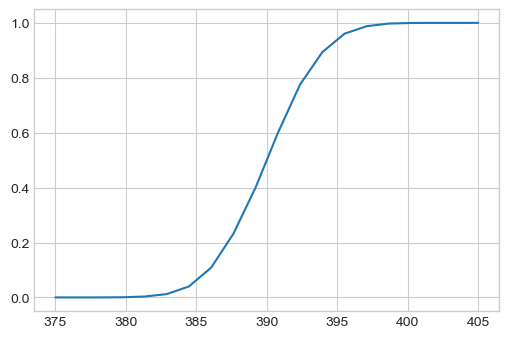

In [2]:

import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
plt.style.use('seaborn-whitegrid')
plt.rcParams['figure.dpi'] = 100
 

def edf(samples, x: float) -> float:
    """Эмпирическая функция распределения (empirical distribution
    function).
    """
    return samples[samples < x].shape[0] / samples.shape[0]
 

def get_mean_samples_uni(n: int) -> np.ndarray:
    """Возвращает выборку из значений среднего от `n` равномерно распределённых
    случайных величин.
    """
    samples = np.random.uniform(12, 14, size=(n, 30))
#     return samples.mean(axis=0)
    return samples.sum(axis=1)


n = 20000
 
samples = get_mean_samples_uni(n)
#plt.hist(samples, density=True, bins=30)
#plt.show()
 
ox = np.linspace(375, 405, 20)
oy = np.array([edf(samples=samples, x=x) for x in ox])
 
plt.plot(ox, oy)
 
# а)
print('меньше 390 граммов', edf(samples=samples, x=390))
# б) 
print('больше 395 граммов', 1 - edf(samples=samples, x=395))
# в)
print('от 380 до 400 граммов', edf(samples=samples, x=400) - edf(samples=samples, x=380))
